In [1]:
from pyspark import SparkContext

In [2]:
sc = SparkContext(master="local", appName="TransformacionesYAcciones")

In [3]:
rdd1 = sc.parallelize([1,2,3])
type(rdd1)

pyspark.rdd.RDD

In [4]:
rdd1.collect()

[1, 2, 3]

In [5]:
sc

<SparkContext master=local appName=TransformacionesYAcciones>

In [6]:
pwd

'/home/geovanny/Documents'

In [7]:
path = 'path/to/data/folder'

equiposOlimpicosRDD = sc.textFile(path+'paises.csv') \
    .map(lambda line: line.split(","))

In [8]:
equiposOlimpicosRDD.take(5)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG']]

In [9]:
equiposOlimpicosRDD.map(lambda x: (x[2])).distinct().count()

231

In [10]:
equiposOlimpicosRDD \
    .map(lambda x: (x[2], x[1]))\
    .groupByKey() \
    .mapValues(len).take(5)

[('sigla', 1), ('AUT', 11), ('MEX', 9), ('ARG', 18), ('AFG', 1)]

In [11]:
equiposOlimpicosRDD \
    .map(lambda x: (x[2], x[1]))\
    .groupByKey() \
    .mapValues(list).take(5)

[('sigla', ['equipo']),
 ('AUT',
  ['30. Februar',
   'Austria',
   'Austria-1',
   'Austria-2',
   'Breslau',
   'Brigantia',
   'Donar III',
   'Evita VI',
   'May-Be 1960',
   '"R.-V. Germania; Leitmeritz"',
   'Surprise']),
 ('MEX',
  ['A North American Team',
   'Acipactli',
   'Chamukina',
   'Mexico',
   'Mexico-1',
   'Mexico-2',
   'Nausikaa 4',
   'Tlaloc',
   'Xolotl']),
 ('ARG',
  ['Acturus',
   'Antares',
   'Arcturus',
   'Ardilla',
   'Argentina',
   'Argentina-1',
   'Argentina-2',
   'Blue Red',
   'Covunco III',
   'Cupidon III',
   'Djinn',
   'Gullvinge',
   'Matrero II',
   'Mizar',
   'Pampero',
   'Rampage',
   'Tango',
   'Wiking']),
 ('AFG', ['Afghanistan'])]

In [12]:
equiposArgentinos = equiposOlimpicosRDD.filter(lambda l: "ARG" in l)
equiposArgentinos.collect()

[['4', 'Acturus', 'ARG'],
 ['37', 'Antares', 'ARG'],
 ['42', 'Arcturus', 'ARG'],
 ['43', 'Ardilla', 'ARG'],
 ['45', 'Argentina', 'ARG'],
 ['46', 'Argentina-1', 'ARG'],
 ['47', 'Argentina-2', 'ARG'],
 ['119', 'Blue Red', 'ARG'],
 ['238', 'Covunco III', 'ARG'],
 ['252', 'Cupidon III', 'ARG'],
 ['288', 'Djinn', 'ARG'],
 ['436', 'Gullvinge', 'ARG'],
 ['644', 'Matrero II', 'ARG'],
 ['672', 'Mizar', 'ARG'],
 ['774', 'Pampero', 'ARG'],
 ['843', 'Rampage', 'ARG'],
 ['1031', 'Tango', 'ARG'],
 ['1162', 'Wiking', 'ARG']]

In [13]:
equiposOlimpicosRDD.count()

1185

In [14]:
equiposOlimpicosRDD.countApprox(20)

1185

In [15]:
deportistaOlimpicoRDD = sc.textFile(path+"deportista.csv") \
    .map(lambda l: l.split(","))
deportistaOlimpicoRDD2 = sc.textFile(path+"deportista2.csv") \
    .map(lambda l: l.split(","))

In [16]:
deportistaOlimpicoRDD = deportistaOlimpicoRDD \
    .union(deportistaOlimpicoRDD2)

In [17]:
#Operacion para evaluar datos sanos antes de hacer union
deportistaOlimpicoRDD.count()

135572

In [18]:
equiposOlimpicosRDD.top(2)

[['id', 'equipo', 'sigla'], ['999', 'Stella-2', 'NOR']]

In [19]:
deportistaOlimpicoRDD.top(2)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['99999', 'Alexander Grant Alick Rennie', '1', '32', '182', '71', '967']]

In [20]:
# La accion evita que se cree un rdd con la transformacion
deportistaOlimpicoRDD.map(lambda l: [l[-1],l[:-1]]) \
    .join(equiposOlimpicosRDD.map(lambda x: [x[0], x[2]])) \
    .take(6)

[('199', (['1', 'A Dijiang', '1', '24', '180', '80'], 'CHN')),
 ('199', (['2', 'A Lamusi', '1', '23', '170', '60'], 'CHN')),
 ('199', (['602', 'Abudoureheman', '1', '22', '182', '75'], 'CHN')),
 ('199', (['1463', 'Ai Linuer', '1', '25', '160', '62'], 'CHN')),
 ('199', (['1464', 'Ai Yanhan', '2', '14', '168', '54'], 'CHN')),
 ('199', (['3605', 'An Weijiang', '1', '22', '178', '72'], 'CHN'))]

In [21]:
# La diferencia con take es que aqui se cogen datos aleatorios, \
# false para evitar repetidos, 6 la cantidad y 25 una seed
deportistaOlimpicoRDD.map(lambda l: [l[-1],l[:-1]]) \
    .join(equiposOlimpicosRDD.map(lambda x: [x[0], x[2]])) \
    .takeSample(False,6,25)

[('362', (['131505', 'Steven Woodburn', '1', '24', '185', '90'], 'FRA')),
 ('967', (['13626', 'Jill Brresen', '2', '22', '170', '57'], 'RSA')),
 ('482', (['44299', 'Gumundur Gumundsson', '1', '23', '174', '77'], 'ISL')),
 ('970', (['68062', 'Lee MinHui', '2', '28', '174', '65'], 'KOR')),
 ('794', (['92442', 'Luis Paz Zoldan', '1', '19', '187', '82'], 'PER')),
 ('413', (['26822', 'Jared Mark Deacon', '1', '24', '185', '77'], 'GBR'))]

In [22]:
resultado = sc.textFile(path+"resultados.csv") \
    .map(lambda l: l.split(","))

In [23]:
resultadoGanador = resultado.filter(lambda l: 'NA' not in l[1])


In [24]:
resultadoGanador.take(2)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id'],
 ['4', 'Gold', '4', '2', '4']]

In [25]:
(deportistaOlimpicoRDD
           .map(lambda l : [l[-1],l[:-1]]) 
           .join(equiposOlimpicosRDD.map(lambda l : [l[0],l[2]]))
           .map(lambda l : (l[1][0][0], (l[0],l[1][0][1:],l[1][1]))) 
           .join(resultadoGanador.map(lambda l : [l[2],l[1]])) 
           .takeSample(False,6,25))

[('54832',
  (('982', ['Carlos Jimnez Snchez', '1', '24', '201', '100'], 'ESP'),
   'Silver')),
 ('135219',
  (('944', ['Urka olnir', '2', '22', '173', '64'], 'SLO'), 'Bronze')),
 ('106724',
  (('705', ['Adrie Ard Schenk', '1', '19', '190', '90'], 'NED'), 'Gold')),
 ('112317',
  (('1096', ['Justus Ketchum Smith', '1', '26', '0', '0'], 'USA'), 'Gold')),
 ('124518',
  (('705', ['Daniel Daan van Dijk', '1', '21', '0', '0'], 'NED'), 'Gold')),
 ('42668',
  (('1096', ['Joseph Tilford Lee Joe Greene', '1', '25', '183', '70'], 'USA'),
   'Bronze'))]

In [26]:
valoresMedallas = {'Gold':7,
                  'Silver':5,
                   'Bronze':4}

In [27]:
paisesMedallas = (deportistaOlimpicoRDD
           .map(lambda l : [l[-1],l[:-1]]) 
           .join(equiposOlimpicosRDD.map(lambda l : [l[0],l[2]]))
           .map(lambda l : (l[1][0][0], (l[0],l[1][0][1:],l[1][1]))) 
           .join(resultadoGanador.map(lambda l : [l[2],l[1]])))

In [28]:
paisYMedalla = paisesMedallas \
    .map(lambda x: ( x[1][0][-1], valoresMedallas[x[1][1]] ))

In [29]:
from operator import add
resultado_valor_pais = paisYMedalla.reduceByKey((add)) \
    .sortBy(lambda x: x[1], ascending=False)

In [30]:
resultado_valor_pais.take(10)

[('USA', 32137),
 ('URS', 14834),
 ('GBR', 10925),
 ('GER', 10896),
 ('FRA', 9265),
 ('ITA', 8755),
 ('SWE', 8110),
 ('CAN', 7209),
 ('AUS', 6755),
 ('HUN', 6142)]

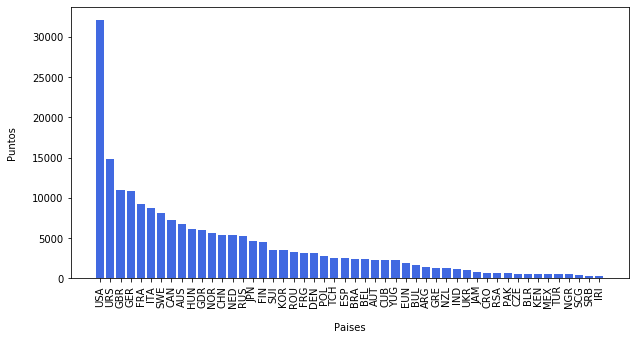

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(resultado_valor_pais.map(lambda x:x[0]).take(50)
            , resultado_valor_pais.map(lambda x:x[1]).take(50) 
            , color='royalblue')
plt.xticks(rotation=90)
plt.xlabel('Paises',labelpad=15)
plt.ylabel('Puntos',labelpad=15)
plt.show()

In [ ]:
#sc.stop()